<img src='ipydata/금형.png' align='center' width="1500px"/>

<ul><li style="font-size:2em;">제조 데이터 준비</li></ul>
<img src="ipydata/진동.png" style="display:block; margin:0 auto; width:600px">
<span style="font-size:20px;">사용대상: 금형 뿌리업종 내 금형 동작 시 발생하는 진동 제조데이터(Piezo Sensor 활용)</span>

<ul><li style="font-size:2em;">제조물</li></ul>
<div style="width:1200px; margin:0 auto;">
<a href="#"><img style="width:300px; height:300px" src="ipydata/볼트2.png"></a>
<a href="#"><img style="width:300px; height:300px" src="ipydata/볼트1.png"></a>
</div>
<br>
<span style="font-size:20px;">차량 부속용 금속 볼트 및 너트</span>

<ul><li style="font-size:2em;">현장문제</li></ul>
<img src="ipydata/크랙.png" style="display:block; margin:0 auto;">
<span style="font-size:20px;"><br>지속적인 공정으로 인해 발생하는 금형 크랙 및 파손에 대한 예측이 불가하며, 공정상 지속적인 불량이 발생할 경우 공정을 정지하여 금형 파손 상태를 확인하고 교체하는 방식을 취하고 있음</span>

<ul><li style="font-size:2em;">제조AI 개발 목적</li></ul>
<img src="ipydata/예지보전.png" style="display:block; margin:0 auto;"><br>
<span style="font-size:20px;">진동 제조데이터를 활용하여 금형의 크랙 발생 및 파손 상태를 예측하고, 공정 설비의 예지 보전을 수행할 수 있게 하기 위함</span>

## 라이브러리(Import) 설치 

### 코드에 필요한 모듈 설치

In [1]:
# !pip install tensorflow --user
# !pip install keras --user
# !pip install pandas --user
# !pip install numpy --user
# !pip install sklearn --user
# !pip install seaborn --user
# !pip install datetime --user
# !pip install matplotlib --user
# !pip install pydot --user
# !pip install graphviz --user
# !pip install protobuf==3.20.1

## 라이브러리(Import) 불러오기

### 엑셀 제조데이터 및 시각화를 위해 다음 모듈 사용

In [2]:
# 제조데이터 분석 툴
import pandas as pd  
import numpy as np

# 운영체계와 관련된 툴
import os
import glob

# 시각화 
import seaborn as sns # 시본 - 시각화 툴 
import matplotlib.pyplot as plt # matplotlib - 시각화 툴 
%matplotlib inline

# 경고 방지
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,15)) # 그래프 크기 지정 
plt.style.use('ggplot') # 그래프 스타일 지정 

<Figure size 1500x1500 with 0 Axes>

##  분석용 제조데이터 불러오기 

제조 데이터 파일들이 있는 폴더의 경로를 불러와서, 해당 폴더에 있는 파일 경로를 모두 호출한다. \
불러온 모든 파일 경로를 읽어, 데이터를 리스트에 담은 후 하나의 데이터프레임으로 병합했다.

### 현재 위치 출력

In [3]:
#현재 위치
os.getcwd()

'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic'

### 제조데이터 위치 선언

In [4]:
new_path = os.path.join(os.getcwd(), 'data') # 제조데이터 위치 확인 
new_path

# 열고자 하는 파일과 그 파일의 경로를 입력 
pathName = os.path.join(new_path, 'SoundToNumeric')
pathName

'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric'

### 제조데이터 위치 내 파일 리스트 확인

In [5]:
glob.glob(pathName+'/*')# 보유하고 있는 제조데이터 파일의 전체 주소 확인 

['C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\Error Lot list.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.06.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.07.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.08.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.09.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.10.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.13.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.14.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.15.csv',
 'C:\\workSpace\\Test\\tfTest\\RootLab_Metalic\\data\\SoundToNumeric\\SoundToNumeric_2021.09.

### 제조데이터 프레임 생성

In [6]:
dataList = list()
cnt = 0

for pth in glob.glob(pathName+'/*')[1:]:# 에러 제조데이터를 제외하고 병합
    origin=pd.read_csv(pth,index_col=False )# read_csv를 이용해 파일을 읽어서 변수에 담는다 
    origin['Date'] = "-".join(pth.split('_')[-1 ].split('.')[:-1 ]) # 날짜 추가 
    cnt = cnt + len(origin) # 제조데이터 검증을 위한 row 누적코드
    dataList.append(origin) # 리스트에 담는다

### 제조데이터 개수 확인

In [7]:
len(dataList) ,len( glob.glob(pathName+'/*')[1:]) # 제조데이터가 담겼는지 확인 

(33, 33)

### 제조데이터 병합

In [8]:
CatList= pd.concat(dataList,axis=0 , ignore_index=True ) # 제조데이터 병합하여 하나의 데이터로 변환 
CatList# 데이터프레임 확인 

,Process,Time,Vibration,Current,Date
0,1,오후 4:24:03.0,75.139142,1.610,2021-09-06
1,1,오후 4:24:08.0,76.660421,1.530,2021-09-06
2,1,오후 4:24:13.0,77.177660,1.701,2021-09-06
3,1,오후 4:24:18.0,76.586434,1.736,2021-09-06
4,1,오후 4:24:23.0,77.877104,1.748,2021-09-06
...,...,...,...,...,...
51079,43,오후 6:45:03.4,67.312474,1.560,2021-10-27
51080,43,오후 6:45:08.4,65.533664,1.472,2021-10-27
51081,43,오후 6:45:13.4,66.740424,1.523,2021-10-27
51082,43,오후 6:45:18.4,68.045185,1.483,2021-10-27


# 제조데이터 탐색

하나의 데이터 프레임으로 합친 제조 데이터를 탐색한다. \
제조 데이터의 컬럼과 데이터 타입, 데이터의 개수와 요약을 확인하고 데이터 프레임 내 결측치의 비율을 확인한다. \
제조 데이터 컬럼을 시각화해서, 컬럼별 데이터의 분포를 확인한다.

### 제조데이터 프레임 사본 생성

In [9]:
df = CatList.copy()# 제조데이터 사본 생성  

### 제조데이터 프레임 컬럼 확인

In [10]:
df.columns # 제조데이터 컬럼 확인 

Index(['Process', 'Time', 'Vibration', 'Current', 'Date'], dtype='object')

### 제조데이터 프레임 타입, 개수 확인

In [11]:
df.info()# 제조데이터 유형확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51084 entries, 0 to 51083
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Process    51084 non-null  int64  
 1   Time       51084 non-null  object 
 2   Vibration  51084 non-null  float64
 3   Current    51084 non-null  float64
 4   Date       51084 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.9+ MB


### 제조데이터 프레임 요약

In [12]:
df.describe() # 제조데이터의 각종 통계량을 요약해서 확인

,Process,Vibration,Current
count,51084.000000,51084.000000,51084.000000
mean,22.000000,74.516677,1.566349
std,12.409795,12.875605,0.157813
min,1.000000,64.007846,0.837109
25%,11.000000,68.556710,1.528000
50%,22.000000,71.193336,1.596000
75%,33.000000,74.139142,1.656000
max,43.000000,134.188544,2.060688


##  제조데이터 비율 확인 

### 제조조데이터 프레임 결측치 확인

In [13]:
df = df[['Date','Process', 'Time', 'Vibration', 'Current']]# 사용하고자 하는 컬럼만 추출 

for col in df.columns:# 결측치 확인을 위한 코드
    percent = df[col].isnull().sum() / df[col].shape[0] # 결측치를 비율화를 위한 계산 
    msg='col:{:>20}\t Percent of NaN value: {:.2f}%'.format(col,100 * (percent))# 결측치를 비율화하여 텍스트로 출력
    print(msg)

col:                Date	 Percent of NaN value: 0.00%
col:             Process	 Percent of NaN value: 0.00%
col:                Time	 Percent of NaN value: 0.00%
col:           Vibration	 Percent of NaN value: 0.00%
col:             Current	 Percent of NaN value: 0.00%


## 제조데이터 분포 확인 

### 제조데이터 프레임 시각화

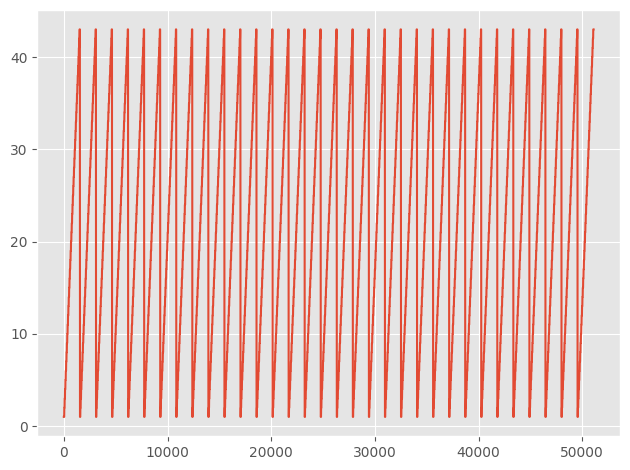

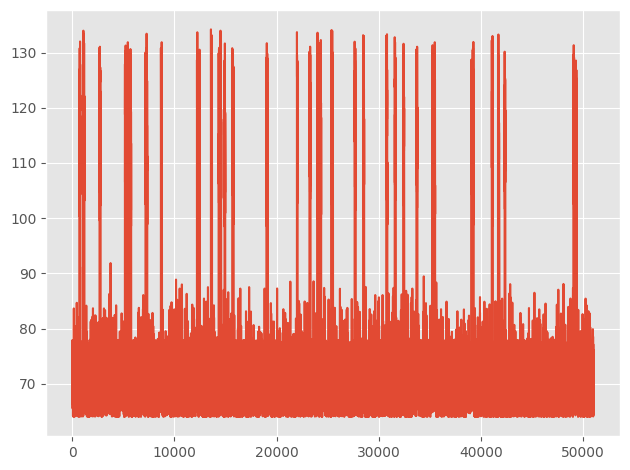

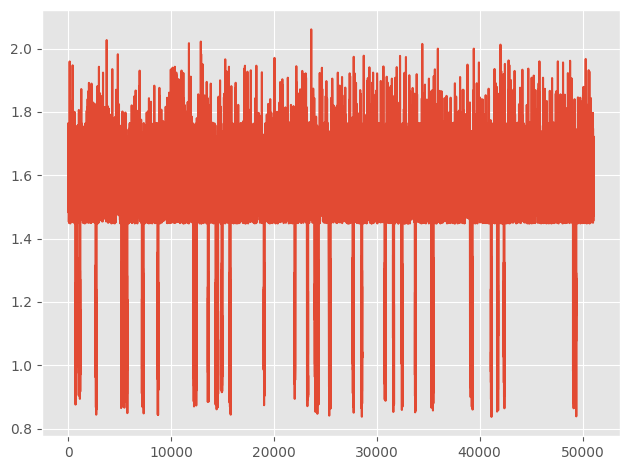

In [14]:
for i in df.columns: # 제조데이터 컬럼을 시각화 
    try :
        df[i].plot() 
        plt.tight_layout()
        plt.show()
    except :pass

# 제조 데이터 정규화

학습에 사용할 Vibration, Current를 각 컬럼별로 MinMax와 Standard 정규화를 실시하고 plot으로 시각화를 해 두가지 방법의 정규화 결과를 비교한다. 


### 제조데이터 프레임 나누기

In [15]:
tNc = df[df.columns[3:]] # 사용하고자 하는 컬럼 추출

## MinMax 정규화

### 컬럼 정규화

In [16]:
# Current컬럼 정규화(Normalization) 진행 
curr_norm = (tNc['Current'] - tNc['Current'].min(axis = 0)) / (tNc['Current'].max(axis = 0) - tNc['Current'].min(axis = 0))
print(curr_norm)

0        0.631664
1        0.566282
2        0.706036
3        0.734641
4        0.744448
           ...   
51079    0.590801
51080    0.518880
51081    0.560561
51082    0.527870
51083    0.550754
Name: Current, Length: 51084, dtype: float64


### 컬럼 정규화

In [17]:
# Vibration 컬럼 정규화(Normalization) 진행 
vibr_norm = (tNc['Vibration'] - tNc['Vibration'].min(axis = 0)) / (tNc['Vibration'].max(axis = 0) - tNc['Vibration'].min(axis = 0))
print(vibr_norm)

0        0.158609
1        0.180286
2        0.187656
3        0.179231
4        0.197622
           ...   
51079    0.047087
51080    0.021741
51081    0.038936
51082    0.057528
51083    0.063616
Name: Vibration, Length: 51084, dtype: float64


### 정규화 제조데이터 시각화

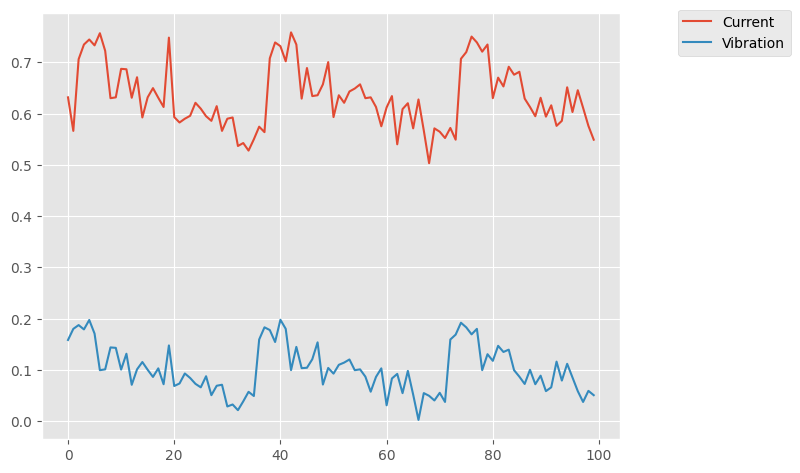

In [18]:
# 정규화를 진행한 제조데이터 시각화 - 전체 제조데이터중 제조데이터의 특정부분 0부터 100까지만 추출하여 시각화 
curr_norm[:100].plot() 
vibr_norm[:100].plot() 

plt.tight_layout()
plt.legend(loc=(1.1, 0.9)) # 범례의 위치
plt.show()

In [19]:
# !pip install scikit-learn

## Standard 정규화

### 제조데이터 스케일링을 위한 모듈 사용

In [20]:
from sklearn.preprocessing import StandardScaler # 제조데이터 스케일링을 위한 패키지 임포트 

### 제조데이터 스케일링 및 시각화

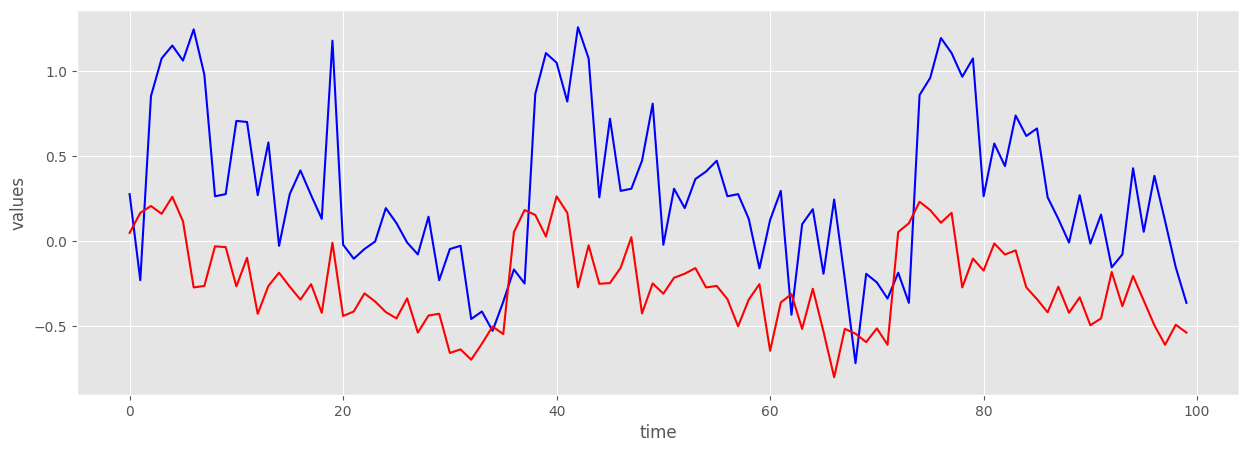

In [21]:
# Current, Vibration standardize를 위한 제조데이터 변환 
curr_ = tNc['Current'].iloc[:,].values
curr_ = curr_.reshape(len(curr_), -1)
vibr_ = tNc['Vibration'].iloc[:,].values
vibr_ = vibr_.reshape(len(vibr_), -1)

# standardize
scaler = StandardScaler()
std_curr_ = scaler.fit_transform(curr_) # 스케일 된 curr_
std_temp_ = scaler.fit_transform(vibr_) # 스케일 된 temp_

plt.figure(figsize=(15,5))
plt.xlabel('time')   # x 레이블 
plt.ylabel('values')# y 레이블 
plt.plot(np.arange(100), std_curr_[:100], color='b') 
plt.plot(np.arange(100), std_temp_[:100], color='r')

#  제조데이터 정제(전처리)

에러 제조 데이터를 데이터 프레임으로 불러와 전처리를 실시한다. \
일자별 데이터를 볼 수 있도록, 날짜를 컬럼으로 바꾸는 전처리를 실시했다. 

### 에러 제조데이터 리스트를 이용하여 제조데이터 프레임 생성

In [23]:
df_er = pd.read_csv(glob.glob(pathName+'/*')[0], index_col=False )# 제조데이터 로드
df_er.head() # 제조데이터가 잘 호출 되었는지 head를 찍어서 확인 

,0,1,2,3,4,5,6,7,8,9,10,11
0,2021-09-06,32.0,33.0,20.0,21.0,22.0,31.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-07,32.0,33.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-09,15.0,16.0,17.0,21.0,22.0,23.0,29.0,30.0,31.0,NaN,NaN
4,2021-09-10,32.0,28.0,29.0,30.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


### 에러 제조데이터 전처리

In [24]:
df_err= df_er.transpose()  # 에러 제조데이터를 사용하기 편한 상태로 만들기위한 전치작업 진행  
df_err

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 에러 제조데이터 컬럼 이름 변경

In [25]:
df_err.columns = df_err.iloc[0] # 제조데이터 컬럼 이름 변경 
df_err

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 에러 제조데이터 내 특정 row 제거

In [26]:
df_err = df_err.iloc[1:,:] # 필요 없는 row 제거 
df_err

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN
6,31.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,17.0,26.0,NaN,NaN,NaN,NaN,31.0,NaN
7,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 에러 제조데이터 확인

In [27]:
df_err.head() # 변경된 제조데이터 확인 

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
2,33.0,33.0,NaN,16.0,28.0,28.0,NaN,41.0,35.0,13.0,...,NaN,NaN,12.0,42.0,17.0,NaN,NaN,NaN,33.0,NaN
3,20.0,34.0,NaN,17.0,29.0,29.0,NaN,39.0,3.0,14.0,...,NaN,NaN,13.0,43.0,NaN,NaN,NaN,NaN,37.0,NaN
4,21.0,NaN,NaN,21.0,30.0,NaN,NaN,NaN,34.0,16.0,...,NaN,NaN,15.0,24.0,NaN,NaN,NaN,NaN,38.0,NaN
5,22.0,NaN,NaN,22.0,31.0,NaN,NaN,NaN,36.0,17.0,...,NaN,NaN,16.0,25.0,NaN,NaN,NaN,NaN,39.0,NaN


### 에러 제조데이터 요약

In [28]:
df_err.describe() # 제조데이터의 각종 통계량을 요약해서 확인

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
count,6.0,3.0,0,9.0,5.0,3.0,0,3.0,5.0,8.0,...,0,0,6.0,6.0,2.0,0,0,0,6.0,0
unique,6.0,3.0,0,9.0,5.0,3.0,0,3.0,5.0,8.0,...,0,0,6.0,6.0,2.0,0,0,0,6.0,0
top,32.0,32.0,NaN,15.0,32.0,27.0,NaN,40.0,2.0,12.0,...,NaN,NaN,11.0,41.0,16.0,NaN,NaN,NaN,32.0,NaN
freq,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN


##  제조데이터 특성을 기반으로 결측치 대체 

에러 제조 데이터에서 결측치의 비율을 확인하고, 결측치를 0으로 바꿨다.

### 에러 제조데이터 결측치 비율 확인

In [29]:
for col in df_err.columns:
    percent = df_err[col].isnull().sum() / df_err[col].shape[0]
    msg = 'column:{:>20}\t Percent of NaN value: {:.2f}%'.format(col,100 * (percent))
    print(msg)

column:          2021-09-06	 Percent of NaN value: 45.45%
column:          2021-09-07	 Percent of NaN value: 72.73%
column:          2021-09-08	 Percent of NaN value: 100.00%
column:          2021-09-09	 Percent of NaN value: 18.18%
column:          2021-09-10	 Percent of NaN value: 54.55%
column:          2021-09-13	 Percent of NaN value: 72.73%
column:          2021-09-14	 Percent of NaN value: 100.00%
column:          2021-09-15	 Percent of NaN value: 72.73%
column:          2021-09-16	 Percent of NaN value: 54.55%
column:          2021-09-17	 Percent of NaN value: 27.27%
column:          2021-09-23	 Percent of NaN value: 63.64%
column:          2021-09-24	 Percent of NaN value: 100.00%
column:          2021-09-27	 Percent of NaN value: 72.73%
column:          2021-09-28	 Percent of NaN value: 100.00%
column:          2021-09-29	 Percent of NaN value: 81.82%
column:          2021-09-30	 Percent of NaN value: 0.00%
column:          2021-10-01	 Percent of NaN value: 54.55%
column:    

### 에러 제조데이터 결측치 대체

In [30]:
df_err = df_err.fillna(0) # 결측 제조데이터 0으로 치환 
df_err.head() # 제조데이터 확인

0,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-13,2021-09-14,2021-09-15,2021-09-16,2021-09-17,...,2021-10-14,2021-10-15,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-25,2021-10-26,2021-10-27
1,32.0,32.0,0,15.0,32.0,27.0,0,40.0,2.0,12.0,...,0,0,11.0,41.0,16.0,0,0,0,32.0,0
2,33.0,33.0,0,16.0,28.0,28.0,0,41.0,35.0,13.0,...,0,0,12.0,42.0,17.0,0,0,0,33.0,0
3,20.0,34.0,0,17.0,29.0,29.0,0,39.0,3.0,14.0,...,0,0,13.0,43.0,0.0,0,0,0,37.0,0
4,21.0,0.0,0,21.0,30.0,0.0,0,0.0,34.0,16.0,...,0,0,15.0,24.0,0.0,0,0,0,38.0,0
5,22.0,0.0,0,22.0,31.0,0.0,0,0.0,36.0,17.0,...,0,0,16.0,25.0,0.0,0,0,0,39.0,0


## 무의미한 특성 제거  

### 제조데이터 필요 없는 column 제거

In [31]:
pick_data = df[df.columns[3:]]
pick_data.head(1)

,Vibration,Current
0,75.139142,1.61


### 제조데이터 확인

In [32]:
df[df['Process'] == df_err['2021-09-06'][0]] # Process 2021-09-06[0]인(32.0) 부분이 같은 제조데이터 추출하여 확인 

,Date,Process,Time,Vibration,Current
1116,2021-09-06,32,오후 6:08:15.6,120.673169,0.958032
1117,2021-09-06,32,오후 6:08:20.6,121.721175,1.098960
1118,2021-09-06,32,오후 6:08:25.6,123.522882,1.267960
1119,2021-09-06,32,오후 6:08:30.7,118.620181,1.062032
1120,2021-09-06,32,오후 6:08:35.7,133.402776,1.193891
...,...,...,...,...,...
50683,2021-10-27,32,오후 6:08:01.3,67.119377,1.532000
50684,2021-10-27,32,오후 6:08:06.3,65.121812,1.448000
50685,2021-10-27,32,오후 6:08:11.3,64.061976,1.519000
50686,2021-10-27,32,오후 6:08:16.3,66.086496,1.474000


### 에러 제조데이터를 통한 통합 제조데이터 프레임 생성

제조 데이터의 process와 에러 제조 데이터의 에러 발생 process 숫자를 매칭해서, 라벨링을 실시했다. \
데이터의 날짜와 process 번호를 매칭해, 해당 공정 순서에 에러가 발생하지 않으면 0, 에러가 발생하면 1로 라벨링을 하고 이를 'NG' 컬럼에 담아 학습을 위한 데이터 프레임을 생성했다.

In [33]:
pick_data['NG'] = 0 # NG 컬럼을 생성하기위한 사전작업 진행 
for dt in df_err.columns:  # 에러 컬럼에서 컬럼명 추출
    pick_DATE = df[df.Date ==dt]
    for i in range(len(df_err)):# len(df_err) : 11개 -> 한 날짜에 최대 에러 11개
        single_feature = df_err[dt][i]# 에러 루트 위치 검출
        if single_feature != 0 :  # single_feature가  0이 아니면 
            c_inx = pick_DATE['Vibration'][pick_DATE['Process'] == single_feature].index
            pick_data['NG'].loc[c_inx] = 1  # 새로 만든 tNc에 넣기 
        else :pass

### 통합 제조데이터 프레임 확인

In [34]:
pick_data['NG'].value_counts()# 추출한 제조데이터 분포 수치 확인 

0    47088
1     3996
Name: NG, dtype: int64

# 학습, 평가 제조데이터 준비

후반 10일치 제조 데이터를 test data로, 나머지를 train data로 분리했다. \
분리한 데이터를 공정 과정에서 통과한 데이터는 ok 리스트에, 통과하지 못한 데이터를 ng 리스트로 나누었다. \
StandardScaler를 이용해 train 데이터를 정규화했다. \
train 데이터의 시퀀스를 생성하고, 이를 8:2의 비율로 나누어 train과 valid로 분리했다. \
앞서 지정한 test data의 Vibration 데이터도 StandardScaler로 정규화해 테스트 제조 데이터 시퀀스를 생성했다. \

## 제조데이터 분리 

### 통합 제조데이터 프레임 확인

In [35]:
# 후반 제조데이터 확인 
# 일일 작업 43개 36개의 루트 10일치 제조데이터 제외
43*36*10

15480

### 통합 제조데이터 프레임 길이 확인

In [36]:
len(pick_data)-15480 # pick_data에서 일일 작업 43개 36개의 루트 10일치 제조데이터 제외한 값

35604

### 학습용 제조데이터 프레임 생성

In [37]:
train_data = pick_data[:35604] # 학습 제조데이터 생성
train_data.info()  # 제조데이터 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vibration  35604 non-null  float64
 1   Current    35604 non-null  float64
 2   NG         35604 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 834.6 KB


### 테스트용 제조데이터 프레임 생성

In [38]:
# 테스트 제조데이터 생성
test_data = pick_data[35604:]
test_data.info() # 제조데이터 정보확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 35604 to 51083
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vibration  15480 non-null  float64
 1   Current    15480 non-null  float64
 2   NG         15480 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 362.9 KB


### 학습용 제조데이터와 테스트용 제조데이터 길이 확인

In [39]:
len(train_data)+len(test_data) # 학습데이터와 테스트 제조데이터의 총합이 전체 데이터인지 확인 

51084

### 학습용 제조데이터 인덱스 설정

In [40]:
# 제조데이터 추출을 위한 인텍스 추출 후 인덱스를 이용하여 제조데이터 추출 
ng_idx_train = train_data[train_data['NG']== 1].index
ok_idx_train = train_data[train_data['NG']== 0].index
tNc_ok_train = train_data.loc[ok_idx_train]
tNc_ng_train = train_data.loc[ng_idx_train]

### 학습용 제조데이터 스케일링

In [41]:
from sklearn.preprocessing import StandardScaler
# 학습 제조데이터 StandardScaler을 이용하여 제조데이터 스케일 진행 
train = tNc_ok_train
scaler = StandardScaler()
scaler = scaler.fit(train[['Vibration']])
train['Vibration'] = scaler.transform(train[['Vibration']])

### 학습용 제조데이터 시퀀스 생성

In [42]:
# sequences화 작업 진행하기 위한 함수 구현- TIME_STEP은 36
TIME_STEP=36 
def create_sequences(X, y, time_steps=TIME_STEP):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i:(i+time_steps)].values)
        #     ys.append(y.iloc[i+time_steps])

    return np.array(Xs), np.array(ys)
# create_sequences를 이용해 학습 제조데이터 생성 
X_train, Y_train = create_sequences(train[['Vibration']], train[['NG']])

### 학습용 제조데이터 분리

In [43]:
# 제조데이터 분리 작업 진행 - 7:3 비율로 나눌 예정 
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2 )
# 제조데이터 길이 확인 
print(len(x_train))
print(len(x_valid))

25833
6459


### 분리된 테스트 제조데이터 스케일링

In [44]:
# test 제조데이터 StandardScaler 확인 
ss_data=StandardScaler().fit_transform(test_data[['Vibration']]) 
print(ss_data)

[[ 0.29003725]
 [ 0.02479778]
 [ 0.24064141]
 ...
 [-0.6138397 ]
 [-0.48704981]
 [-0.4455265 ]]


### 학습 제조데이터 프레임 생성

In [45]:
X_data = pd.DataFrame() # 제조데이터프레임 생성 
X_data['Vibration'] = list(ss_data.reshape(-1)) # 제조데이터 형변환
# create_sequences를 이용해 학습 제조데이터 생성 
X_test, Y_test = create_sequences(X_data[['Vibration']], test_data[['NG']])

### 프레임 평탄화 함수 선언

In [46]:
def flatten(X): # 제조데이터 펼치기 
   # sample x features array.
    flattened_X = np.empty((X.shape[0 ], X.shape[2 ]))
    for i in range(X.shape[0 ]):
        flattened_X[i] = X[i, (X.shape[1 ]-1 ), :]
    return (flattened_X)

### 학습용 타겟 제조데이터 평탄화

In [47]:
label = flatten(Y_test).reshape(-1)
label.shape

(15444,)

# 모델링

LSTM 모델을 구성해, train data를 모델을 학습시키고, validataion data를 앞서 train data에서 분할한 valid data로 지정했다. \
Optimizer로 Adam을 사용했고, loss function은 MSE를 사용했다. epoch는 5로, batch는 128로, learning rate는 0.001로 설정했다. \
모델 학습 과정을 시각화하여, epoch별로 loss값을 확인했다.

## 모델 동작 테스트 

### 모델 인자 설정

In [48]:
# timesteps, features 확인
timesteps = X_train.shape[1]
features = X_train.shape[2]

In [49]:
# pip uninstall protobuf

In [50]:
# pip install protobuf==3.20.1

### 모델 사용을 위한 AI 모듈 사용

In [51]:
# 필요한 패키지 호출
# import keras
import tensorflow
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import *
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

### 모델 정의 및 생성

In [52]:
Lstm_AE_3 = Sequential() 

# Encoder
Lstm_AE_3.add(LSTM(32,activation='relu', input_shape=(timesteps, features), return_sequences=True))
Lstm_AE_3.add(LSTM(16,activation='relu', return_sequences=False))
Lstm_AE_3.add(RepeatVector(timesteps))

# Decoder
Lstm_AE_3.add(LSTM(32, activation='relu', return_sequences=True))
Lstm_AE_3.add(LSTM(16, activation='relu',return_sequences=True))
Lstm_AE_3.add(TimeDistributed(Dense(features)))
Lstm_AE_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVector  (None, 36, 16)           0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 36, 32)            6272      
                                                                 
 lstm_3 (LSTM)               (None, 36, 16)            3136      
                                                                 
 time_distributed (TimeDistr  (None, 36, 1)            17        
 ibuted)                                                

# 훈련

### 모델 학습

In [53]:
# GPU 사용 경우
from tensorflow.keras import backend as K
 
# epochs, batch, lr 지정 
epochs = 5#200
batch = 128
lr = 0.001

if K.image_data_format() == 'channels_last':
    optimizer = tensorflow.keras.optimizers.Adam(lr)
    Lstm_AE_3.compile(loss='mse', optimizer=optimizer)
    history = Lstm_AE_3.fit(x_train, y_train,
              epochs=epochs, batch_size=batch,
              validation_data=(x_valid, y_valid))
else:pass

Epoch 1/5
202/202 [==============================] - 73s 342ms/step - loss: 0.6911 - val_loss: 0.3856
Epoch 2/5
202/202 [==============================] - 70s 348ms/step - loss: 0.3466 - val_loss: 0.3101
Epoch 3/5
202/202 [==============================] - 69s 344ms/step - loss: 0.3045 - val_loss: 0.2859
Epoch 4/5
202/202 [==============================] - 71s 350ms/step - loss: 0.2864 - val_loss: 0.2848
Epoch 5/5
202/202 [==============================] - 70s 346ms/step - loss: 0.2773 - val_loss: 0.2653


In [54]:
# CPU 사용 경우 - 엄청 오래 걸림
# epochs = 5#200
# batch = 128
# lr = 0.001

# optimizer = keras.optimizers.Adam(lr) # optimizer 지정 - Adam(0.001)
# Lstm_AE_3.compile(loss='mse', optimizer=optimizer) #loss - mse
# history = Lstm_AE_3.fit(x_train, y_train,epochs=epochs, batch_size=batch,validation_data=(x_valid, y_valid))

### 모델 학습 과정 시각화

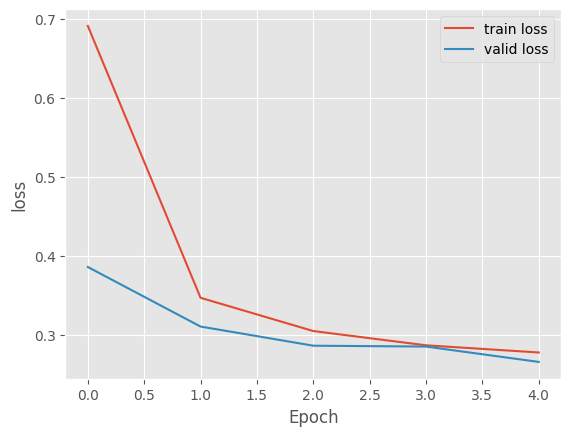

In [55]:
# 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

# 모델 평가 및 해석 

## 결과 시각화 및 해석

학습을 완료한 모델로 예측을 하고, MSE 값을 산출해 모델의 성능을 평가했다. \
Reconstruction error를 산출해 원본 데이터와 예측한 데이터 간의 차이를 확인한다. \
임계값 75% 미만을 정상, 이상을 비정상으로 나누어 시각화한다.

### 테스트용 제조데이터를 통한 모델 성능 평가(MSE)

In [56]:
prediction = Lstm_AE_3.predict(X_test)
mse = np.mean(np.power(X_test - prediction, 2 ), axis=1 )

483/483 [==============================] - 29s 59ms/step


### Reconstruction Error 확인

In [57]:
# reconstruction_error 확인 
error_df = pd.DataFrame({'reconstruction_error': mse.reshape(-1 ),'true_class':label})
error_df.describe()

,reconstruction_error,true_class
count,15444.000000,15444.00000
mean,3.504348,0.04662
std,42.083183,0.21083
min,0.060496,0.00000
25%,0.133420,0.00000
50%,0.160922,0.00000
75%,0.186868,0.00000
max,1912.145628,1.00000


### 75% 백분위 설정

In [58]:
thr = np.percentile(mse.reshape(-1 ),75) # 75%

### 제한된 프레임 시각화 (75% 미만)

11583


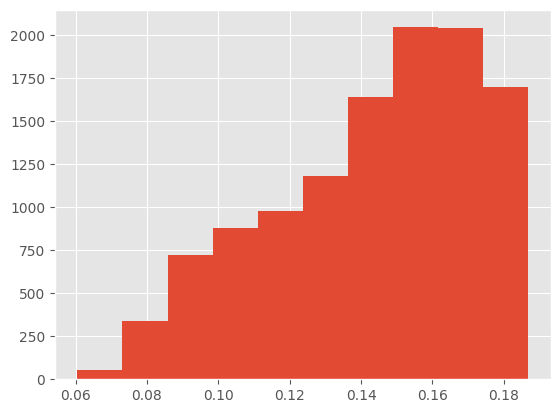

In [59]:
# thresholds를 75% 제한 했을 경우 - thresholds 보다 작을때(정상) 

fig = plt.figure()
ax = fig.add_subplot(111 )
fraud_error_df = error_df[error_df['reconstruction_error'] <thr]
print(len(fraud_error_df))
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10 )

### 제한된 프레임 시각화 (75% 이상)

3861


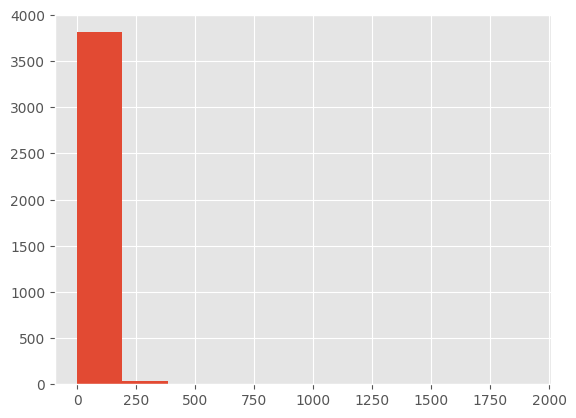

In [60]:
# thresholds를 75% 제한 했을 경우- thresholds 보다 클을때(비정상) 
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['reconstruction_error'] >thr]
print(len(fraud_error_df))
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10 )

### 모델 성능 평가(Confusion Matrix)

Confusion Matrix를 시각화하고, Accuracy, Precision, Recall, F1-Score를 산출해 모델의 성능을 확인한다.


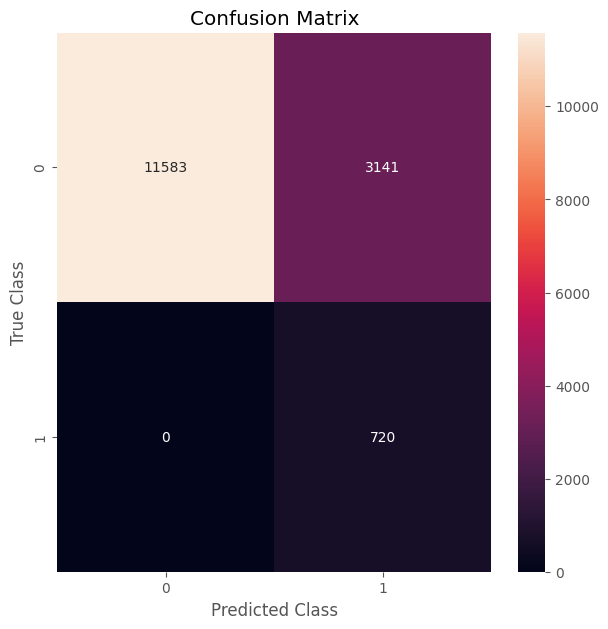

In [61]:
from sklearn.metrics import * # 성능 평가 

pred_y = [1 if e >thr else 0 for e in error_df['reconstruction_error'].values]
conf_matrix = confusion_matrix(error_df['true_class'], pred_y)
plt.figure(figsize=(7 , 7 ))
sns.heatmap(conf_matrix, annot=True , fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

### TP, FN, FP, TN 설정

In [62]:
TP = conf_matrix[0][0]
FN = conf_matrix[0][1]
FP = conf_matrix[1][0]
TN = conf_matrix[0][1]

### 모델 성능 평가 설정

In [63]:
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
Accuracy = (TP + TN) / (TP + FP + FN + TN)
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)

### 모델 성능 평가(Recall)

In [64]:
Recall 

0.7866748166259169

### 모델 성능 평가(Precision)

In [65]:
Precision

1.0

### 모델 성능 평가(Accuracy)

In [66]:
Accuracy

0.8241813602015113

### 모델 성능 평가(F1-Score)

In [67]:
F1_Score

0.8806021211084503